In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
print("Google Drive (drive) смонтирован.")

Mounted at /content/drive
Google Drive (drive) смонтирован.


In [2]:
# --- Установка зависимостей ---
print("--- Устанавливаю зависимости... ---")
!pip install sqlalchemy psycopg2-binary easyocr opencv-python-headless --quiet
print("--- Зависимости установлены. ---")

# --- Импорты и Секреты ---
import sys
import re
import os
from datetime import datetime, date, timedelta
from zoneinfo import ZoneInfo
import math
import cv2
import easyocr
import logging
import matplotlib.pyplot as plt

from sqlalchemy import create_engine, Column, Integer, Float, Date, TIMESTAMP, ForeignKey, Text, func
from sqlalchemy.orm import sessionmaker, relationship, declarative_base, Session
from sqlalchemy.schema import UniqueConstraint, Index
from sqlalchemy.dialects.postgresql import insert
from google.colab import userdata


import gspread
from google.colab import userdata
from oauth2client.service_account import ServiceAccountCredentials

print("--- Импорты завершены. ---")

--- Устанавливаю зависимости... ---
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 15.3 MB/s eta 0:00:00
--- Зависимости установлены. ---
--- Импорты завершены. ---


# **OCR СКРИПТ**

2025-11-13 23:13:42,426 - INFO - Логгер настроен (уровень INFO).


2025-11-13 23:13:45,081 - INFO - ✅ EasyOCR Reader успешно инициализирован.
2025-11-13 23:13:45,082 - INFO - Подключаюсь к БД...
2025-11-13 23:13:45,565 - INFO - ✅ Успешно создано подключение к БД.
2025-11-13 23:13:45,566 - INFO - Определяю модели БД...
2025-11-13 23:13:45,579 - INFO - Проверяю/создаю таблицы в БД...
2025-11-13 23:13:47,003 - INFO - ✅ Таблицы в БД проверены/созданы.
2025-11-13 23:13:47,004 - INFO - Определяю утилиты для БД...
2025-11-13 23:13:47,007 - INFO - ✅ Утилиты для БД определены.
2025-11-13 23:13:47,007 - INFO - Определяю функции OCR...
2025-11-13 23:13:47,010 - INFO - ✅ Функции OCR определены.
2025-11-13 23:13:47,010 - INFO - Определяю главный скрипт...
2025-11-13 23:13:47,013 - INFO - ✅ Все функции определены. Запускаю главный скрипт...
2025-11-13 23:13:47,015 - INFO - 
--------------------------------------------------
2025-11-14 02:13:47 - НАЧАЛО ОБРАБОТКИ OCR
--------------------------------------------------
2025-11-13 23:13:47,016 - INFO - Запрашиваю после

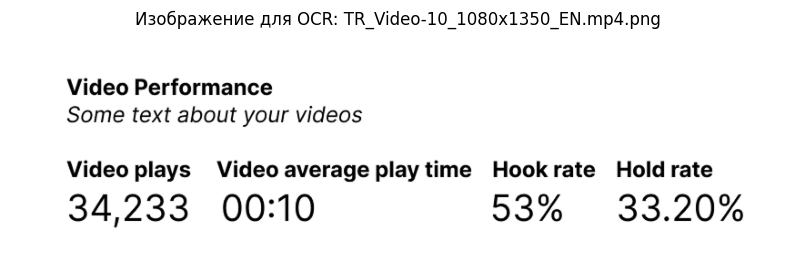

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


2025-11-13 23:13:52,480 - INFO - ✅ Успех (сохранено в БД): 2025-09-30, Проект: TR, Креатив: Video-10, 53.0%, 33.2%
2025-11-13 23:13:52,481 - INFO - --- НОВЫЙ ФАЙЛ: TR_Video-11_1080x1350_EN.mp4.png
2025-11-13 23:13:52,522 - INFO - Визуализация: TR_Video-11_1080x1350_EN.mp4.png


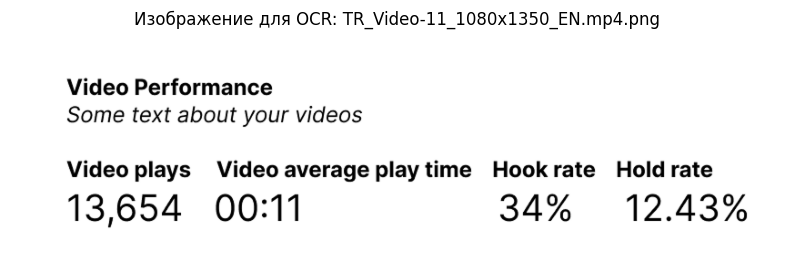

2025-11-13 23:13:56,389 - INFO - ✅ Успех (сохранено в БД): 2025-09-30, Проект: TR, Креатив: Video-11, 34.0%, 12.43%
2025-11-13 23:13:56,390 - INFO - --- НОВЫЙ ФАЙЛ: TR_Video-12_1080x1350_EN.mp4.png
2025-11-13 23:13:56,432 - INFO - Визуализация: TR_Video-12_1080x1350_EN.mp4.png


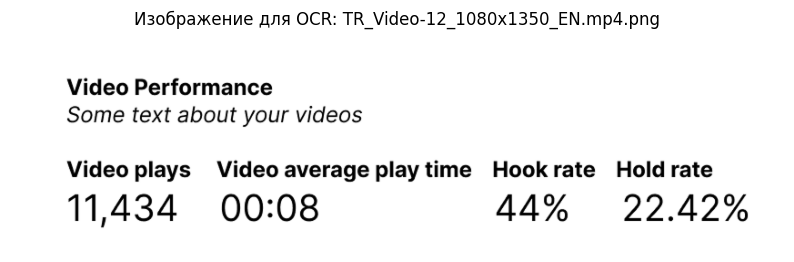

2025-11-13 23:14:00,335 - INFO - ✅ Успех (сохранено в БД): 2025-09-30, Проект: TR, Креатив: Video-12, 44.0%, 22.42%
2025-11-13 23:14:00,336 - INFO - --- НОВЫЙ ФАЙЛ: TR_Video-9_1080x1350_EN.mp4.png
2025-11-13 23:14:00,376 - INFO - Визуализация: TR_Video-9_1080x1350_EN.mp4.png


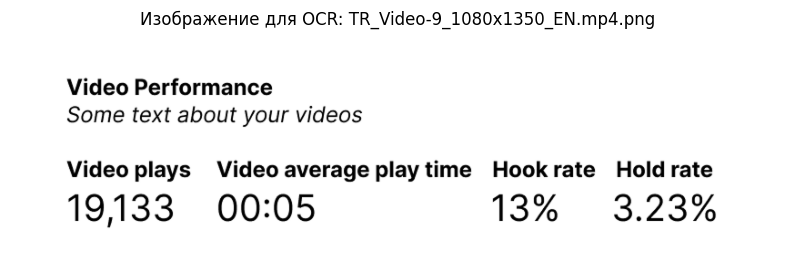

2025-11-13 23:14:05,714 - INFO - ✅ Успех (сохранено в БД): 2025-09-30, Проект: TR, Креатив: Video-9, 13.0%, 3.23%
2025-11-13 23:14:05,716 - INFO - 
=== Обрабатываю месяц 10.25 ===
2025-11-13 23:14:05,721 - INFO - 
>>> Обрабатываю новую дату 15.10 (10.25)

2025-11-13 23:14:05,723 - INFO - --- НОВЫЙ ФАЙЛ: TR_Video-5_1080x1350_EN.mp4.png
2025-11-13 23:14:05,786 - INFO - Визуализация: TR_Video-5_1080x1350_EN.mp4.png


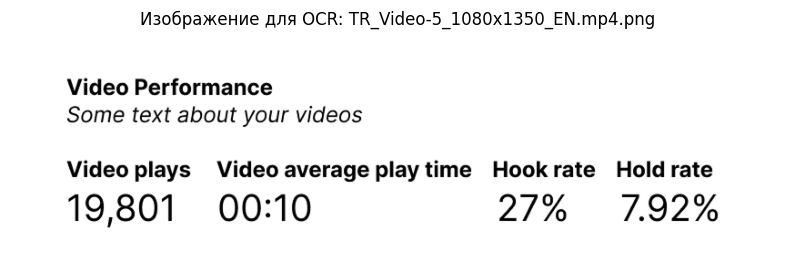

2025-11-13 23:14:09,722 - INFO - ✅ Успех (сохранено в БД): 2025-10-15, Проект: TR, Креатив: Video-5, 27.0%, 7.92%
2025-11-13 23:14:09,723 - INFO - --- НОВЫЙ ФАЙЛ: TR_Video-6_1080x1350_EN.mp4.png
2025-11-13 23:14:09,769 - INFO - Визуализация: TR_Video-6_1080x1350_EN.mp4.png


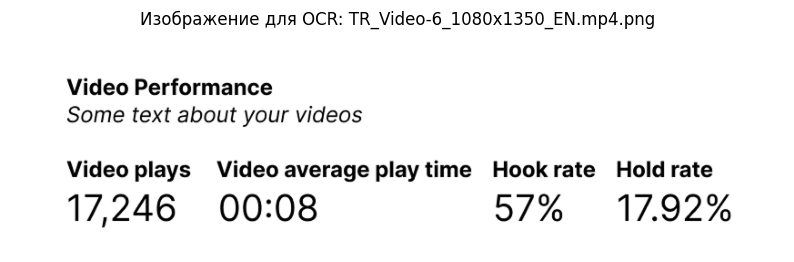

2025-11-13 23:14:13,660 - INFO - ✅ Успех (сохранено в БД): 2025-10-15, Проект: TR, Креатив: Video-6, 57.0%, 17.92%
2025-11-13 23:14:13,660 - INFO - --- НОВЫЙ ФАЙЛ: TR_Video-7_1080x1350_EN.mp4.png
2025-11-13 23:14:13,705 - INFO - Визуализация: TR_Video-7_1080x1350_EN.mp4.png


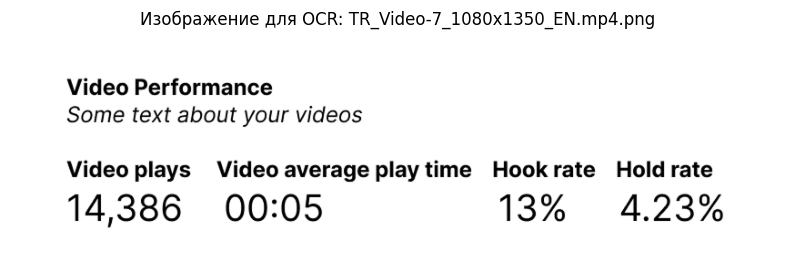

2025-11-13 23:14:18,994 - INFO - ✅ Успех (сохранено в БД): 2025-10-15, Проект: TR, Креатив: Video-7, 13.0%, 4.23%
2025-11-13 23:14:18,995 - INFO - --- НОВЫЙ ФАЙЛ: TR_Video-8_1080x1350_EN.mp4.png
2025-11-13 23:14:19,040 - INFO - Визуализация: TR_Video-8_1080x1350_EN.mp4.png


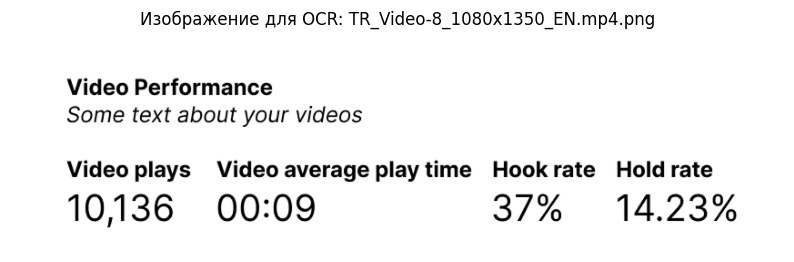

2025-11-13 23:14:22,929 - INFO - ✅ Успех (сохранено в БД): 2025-10-15, Проект: TR, Креатив: Video-8, 37.0%, 14.23%
2025-11-13 23:14:22,930 - INFO - --- НОВЫЙ ФАЙЛ: TR_Video-9_1080x1350_EN.mp4.png
2025-11-13 23:14:22,977 - INFO - Визуализация: TR_Video-9_1080x1350_EN.mp4.png


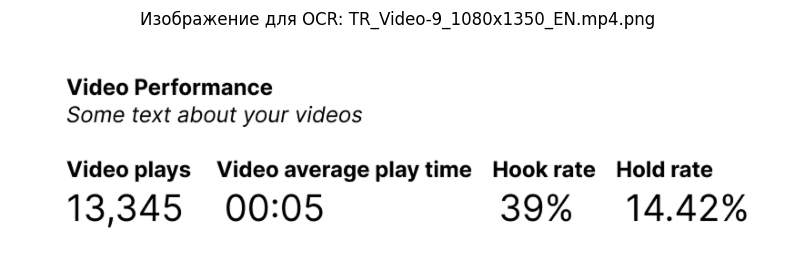

2025-11-13 23:14:26,836 - INFO - ✅ Успех (сохранено в БД): 2025-10-15, Проект: TR, Креатив: Video-9, 39.0%, 14.42%
2025-11-13 23:14:26,837 - INFO - 
>>> Обрабатываю новую дату 22.10 (10.25)

2025-11-13 23:14:26,841 - INFO - --- НОВЫЙ ФАЙЛ: TR_Video-1_1080x1350_EN.mp4.png
2025-11-13 23:14:26,895 - INFO - Визуализация: TR_Video-1_1080x1350_EN.mp4.png


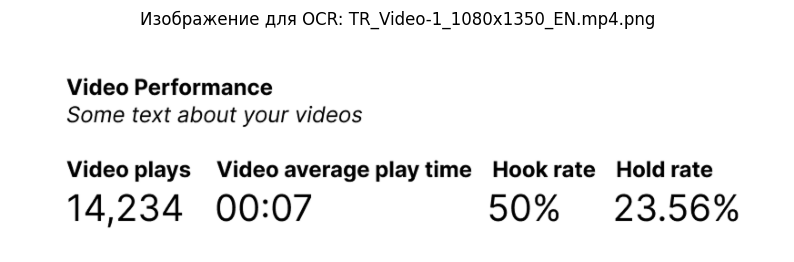

2025-11-13 23:14:32,058 - INFO - ✅ Успех (сохранено в БД): 2025-10-22, Проект: TR, Креатив: Video-1, 50.0%, 23.56%
2025-11-13 23:14:32,059 - INFO - --- НОВЫЙ ФАЙЛ: TR_Video-2_1080x1350_EN.mp4.png
2025-11-13 23:14:32,105 - INFO - Визуализация: TR_Video-2_1080x1350_EN.mp4.png


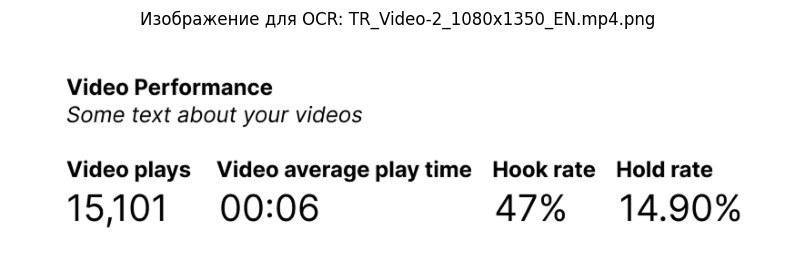

2025-11-13 23:14:35,955 - INFO - ✅ Успех (сохранено в БД): 2025-10-22, Проект: TR, Креатив: Video-2, 47.0%, 14.9%
2025-11-13 23:14:35,956 - INFO - --- НОВЫЙ ФАЙЛ: TR_Video-3_1080x1350_EN.mp4.png
2025-11-13 23:14:36,008 - INFO - Визуализация: TR_Video-3_1080x1350_EN.mp4.png


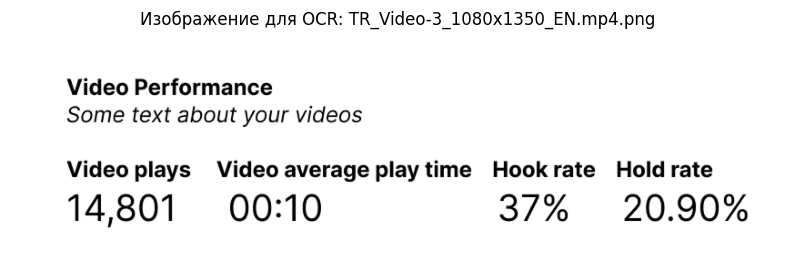

2025-11-13 23:14:39,839 - INFO - ✅ Успех (сохранено в БД): 2025-10-22, Проект: TR, Креатив: Video-3, 37.0%, 20.9%
2025-11-13 23:14:39,840 - INFO - --- НОВЫЙ ФАЙЛ: TR_Video-4_1080x1350_EN.mp4.png
2025-11-13 23:14:39,895 - INFO - Визуализация: TR_Video-4_1080x1350_EN.mp4.png


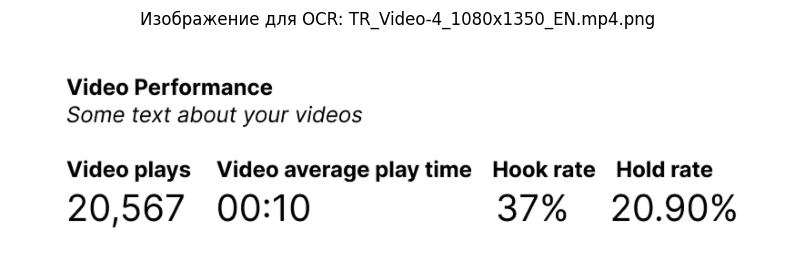

2025-11-13 23:14:44,686 - INFO - ✅ Успех (сохранено в БД): 2025-10-22, Проект: TR, Креатив: Video-4, 37.0%, 20.9%
2025-11-13 23:14:44,688 - INFO - Всего сохранено 13 новых записей. Коммичу изменения...
2025-11-13 23:14:44,743 - INFO - --- ✅ УСПЕХ! Новые данные успешно СОХРАНЕНЫ в БД. ---
2025-11-13 23:14:44,744 - INFO - 

2025-11-13 23:14:44,746 - INFO - --- СЕССИЯ OCR ЗАВЕРШЕНА ---


In [24]:
# --- Настройка Логгирования ---
logger = logging.getLogger("DE_Pipeline_Autotest")
logger.setLevel(logging.INFO)
logger.propagate = False
handler = logging.StreamHandler(sys.stdout)
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
if (logger.hasHandlers()):
    logger.handlers.clear()
logger.addHandler(handler)
logger.info("Логгер настроен (уровень INFO).")


# --- Настройка EasyOCR ---
try:
    reader = easyocr.Reader(['en'])
    logger.info("✅ EasyOCR Reader успешно инициализирован.")
except Exception as e:
    logger.error(f"❌ Не удалось инициализировать EasyOCR: {e}")
    sys.exit(1)

# --- Настройка БД и Модели (SQLAlchemy) ---
logger.info("Подключаюсь к БД...")
try:
    DATABASE_URL = userdata.get('DATABASE_URL')
    if not DATABASE_URL or not DATABASE_URL.startswith("postgresql://"):
        logger.error("❌ Секрет 'DATABASE_URL' не найден или имеет неверный формат.")
        sys.exit(1)

    engine = create_engine(DATABASE_URL)
    SessionLocal = sessionmaker(autocommit=False, autoflush=False, bind=engine)
    Base = declarative_base()
    logger.info("✅ Успешно создано подключение к БД.")
except Exception as e:
    logger.error(f"❌ Ошибка подключения к БД: {e}")
    sys.exit(1)

# --- Описываем таблицы как Python-классы ---
logger.info("Определяю модели БД...")
class Project(Base):
    __tablename__ = 'projects'
    id = Column(Integer, primary_key=True, autoincrement=True)
    name = Column(Text, unique=True, nullable=False)
    created_at = Column(TIMESTAMP, server_default=func.now())
    creatives = relationship("Creative", back_populates="project")

class Creative(Base):
    __tablename__ = 'creatives'
    video_id = Column(Integer, primary_key=True, autoincrement=True)
    name = Column(Text, nullable=False)
    project_id = Column(Integer, ForeignKey('projects.id', ondelete="CASCADE"), nullable=False)
    created_at = Column(TIMESTAMP, server_default=func.now())

    project = relationship("Project", back_populates="creatives")
    hook_hold_metrics = relationship("HookHoldMetrics", back_populates="creative")
    auto_test_metrics = relationship("AutoTestMetrics", back_populates="creative")

    __table_args__ = (
        UniqueConstraint('project_id', 'name', name='_project_creative_uc'),
    )

class HookHoldMetrics(Base):
    __tablename__ = 'hook_hold_metrics'
    id = Column(Integer, primary_key=True, autoincrement=True)
    video_id = Column(Integer, ForeignKey('creatives.video_id', ondelete="CASCADE"), nullable=False)
    hook = Column(Float)
    hold = Column(Float)
    date = Column(Date, nullable=False)
    created_at = Column(TIMESTAMP, server_default=func.now())

    creative = relationship("Creative", back_populates="hook_hold_metrics")

    __table_args__ = (
        UniqueConstraint('video_id', 'date', name='_video_date_uc'),
    )

class AutoTestMetrics(Base):
    __tablename__ = 'auto_test_metrics'
    id = Column(Integer, primary_key=True, autoincrement=True)
    video_id = Column(Integer, ForeignKey('creatives.video_id', ondelete="CASCADE"), nullable=False)
    date = Column(Date, nullable=False)
    team = Column(Text, nullable=False)
    bench = Column(Integer)
    retention = Column(Float)
    clicks = Column(Integer)
    installs = Column(Integer)
    ctr = Column(Float)
    cr = Column(Float)
    created_at = Column(TIMESTAMP, server_default=func.now())

    creative = relationship("Creative", back_populates="auto_test_metrics")

    __table_args__ = (
        UniqueConstraint('video_id', 'date', 'team', name='_video_date_team_uc'),
    )

logger.info("Проверяю/создаю таблицы в БД...")
Base.metadata.create_all(bind=engine)
logger.info("✅ Таблицы в БД проверены/созданы.")


# --- Утилиты для БД (Get-or-Create / Upsert) ---
logger.info("Определяю утилиты для БД...")

def get_or_create_project(session: Session, project_name: str) -> int:
    stmt = insert(Project).values(name=project_name).on_conflict_do_nothing(
        index_elements=['name']
    )
    session.execute(stmt)
    project = session.query(Project.id).filter_by(name=project_name).one()
    return project.id

def get_or_create_creative(session: Session, project_id: int, creative_name: str) -> int:
    stmt = insert(Creative).values(
        project_id=project_id,
        name=creative_name
    ).on_conflict_do_nothing(
        index_elements=['project_id', 'name']
    )
    session.execute(stmt)
    creative = session.query(Creative.video_id).filter_by(
        project_id=project_id,
        name=creative_name
    ).one()
    return creative.video_id

def upsert_hook_hold_metric(session: Session, video_id: int, metric_date, hook_value: float, hold_value: float):
    stmt = insert(HookHoldMetrics).values(
        video_id=video_id,
        date=metric_date,
        hook=hook_value,
        hold=hold_value
    )
    stmt = stmt.on_conflict_do_update(
        index_elements=['video_id', 'date'],
        set_={
            'hook': stmt.excluded.hook,
            'hold': stmt.excluded.hold
        }
    )
    session.execute(stmt)

logger.info("✅ Утилиты для БД определены.")

# --- Функции OCR ---
logger.info("Определяю функции OCR...")

def crop(image):
  height, width = image.shape[:2]
  y2 = int(0.24 * height)
  x2 = int(0.6 * width)
  return image[:y2, :x2]

def vizualise(image, file_path):
    """
    Показывает изображение (обрезанное) прямо в ячейке Colab.
    """
    try:

        logger.info(f"Визуализация: {os.path.basename(file_path)}")
        img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 5))
        plt.imshow(img_rgb)
        plt.title(f"Изображение для OCR: {os.path.basename(file_path)}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        logger.warning(f"Не удалось визуализировать изображение: {e}")


def ocr_easy(file_path):
    try:
        img = cv2.imread(file_path)
        if img is None:
            logger.error(f"Не удалось прочитать файл {file_path}")
            return None, None
        croped_img = crop(img)
        vizualise(croped_img, file_path)
        results = reader.readtext(croped_img)
        text = " ".join([res[1] for res in results])
        return text, results
    except Exception as e:
        logger.error(f"Ошибка в ocr_easy для {file_path}: {e}")
        return None, None

logger.info("✅ Функции OCR определены.")

# --- ГЛАВНЫЙ СКРИПТ ---
logger.info("Определяю главный скрипт...")

# --- Настройки ---
root_folder = "/content/drive/MyDrive/OCR Retriever Project/Test Charts"

filename_pattern = re.compile(r"^([a-zA-Z0-9-]+)_([a-zA-Z0-9-]+)_(\d+x\d+)_([a-zA-Z]{2})\..*$")
YEAR_FOR_PARSING = '2025'

def get_latest_date_from_db(session: Session) -> date:
    logger.info("Запрашиваю последнюю дату из БД (hook_hold_metrics)...")
    latest_date = session.query(func.max(HookHoldMetrics.date)).scalar()

    if latest_date:
        logger.info(f"✅ Самая поздняя дата в БД: {latest_date}")
        return latest_date
    else:
        logger.warning("Таблица hook_hold_metrics пуста. Устанавливаю дату на 01.01.2025.")
        return date(int(YEAR_FOR_PARSING), 1, 1)

def main_ocr_script():
    tz_moscow = ZoneInfo("Europe/Moscow")
    today_str = datetime.now(tz_moscow).strftime("%Y-%m-%d %H:%M:%S")
    logger.info(f"\n{'-'*50}\n{today_str} - НАЧАЛО ОБРАБОТКИ OCR\n{'-'*50}")

    error_files = []
    new_records_saved = 0
    session = SessionLocal()

    try:
        if not os.path.exists(root_folder):
             logger.error(f"❌ КРИТИЧЕСКАЯ ОШИБКА: Путь не найден: {root_folder}")
             logger.error("Пожалуйста, примонтируйте Google Drive и проверьте путь.")
             session.close()
             return

        latest_date_in_db = get_latest_date_from_db(session)
        latest_month_start = latest_date_in_db.replace(day=1)

        for month_folder in sorted(os.listdir(root_folder)):
            month_path = os.path.join(root_folder, month_folder)
            if not (os.path.isdir(month_path) and re.match(r"^\d{2}\.\d{2}$", month_folder)):
                continue

            try:
                month_datetime = datetime.strptime("01." + month_folder, "%d.%m.%y").date()
            except ValueError:
                continue

            if month_datetime < latest_month_start:
                continue

            logger.info(f"\n=== Обрабатываю месяц {month_folder} ===")

            for day_folder in sorted(os.listdir(month_path)):
                day_path = os.path.join(month_path, day_folder)
                if not re.match(r"^\d{2}\.\d{2}$", day_folder):
                    continue
                try:
                    day_datetime = datetime.strptime(day_folder + f'.{YEAR_FOR_PARSING}', "%d.%m.%Y").date()
                except ValueError:
                    logger.warning(f"Неверный формат папки дня: {day_folder}. Пропуск.")
                    continue

                if day_datetime <= latest_date_in_db:
                    continue

                logger.info(f"\n>>> Обрабатываю новую дату {day_folder} ({month_folder})\n")
                date_for_db = day_datetime

                for filename in sorted(os.listdir(day_path)):
                    match = filename_pattern.match(filename)
                    if not match:
                        continue

                    project_name = match.group(1)
                    creative_name = match.group(2)

                    img_path = os.path.join(day_path, filename)
                    logger.info(f"--- НОВЫЙ ФАЙЛ: {filename}")

                    try:
                        text, _ = ocr_easy(img_path)
                        if not text:
                            logger.warning("Ошибка OCR: текст пустой. Пропуск.")
                            error_files.append(img_path)
                            continue

                        m = re.search(r'(\d+[.,]?\d*)%\s+(\d+[.,]?\d*)%', text)
                        if not m:
                            logger.warning(f"Ошибка: Не найден шаблон процентов: '{text}'. Пропуск.")
                            error_files.append(img_path)
                            continue

                        hook = float(m.group(1).replace(',', '.'))
                        hold = float(m.group(2).replace(',', '.'))

                        project_id = get_or_create_project(session, project_name)
                        video_id = get_or_create_creative(session, project_id, creative_name)

                        upsert_hook_hold_metric(
                            session=session,
                            video_id=video_id,
                            metric_date=date_for_db,
                            hook_value=hook,
                            hold_value=hold
                        )

                        logger.info(f"✅ Успех (сохранено в БД): {date_for_db}, Проект: {project_name}, Креатив: {creative_name}, {hook}%, {hold}%")
                        new_records_saved += 1

                    except Exception as e:
                        logger.error(f"КРИТИЧЕСКАЯ ОШИБКА (файл): {e} у {img_path}. Пропуск.")
                        error_files.append(img_path)
                        continue
        if error_files:
          logger.warning("!!!!!!!!!!!!Файлы с ошибками!!!!!!!!!!!!!!")
          for ef in error_files:
              logger.warning(f" - {ef}")
        if new_records_saved > 0:
            logger.info(f"Всего сохранено {new_records_saved} новых записей. Коммичу изменения...")
            session.commit()
            logger.info("--- ✅ УСПЕХ! Новые данные успешно СОХРАНЕНЫ в БД. ---")
        else:
            logger.info("Новых данных для сохранения не найдено.")

    except Exception as e:
        logger.critical(f"\n--- ❌ КРИТИЧЕСКАЯ ОШИБКА (СЕССИЯ): {e} ---\nОткатываю транзакцию.")
        session.rollback()
    finally:
        session.close()
        logger.info("\n" + "="*50 + "\n")
        logger.info("--- СЕССИЯ OCR ЗАВЕРШЕНА ---")

# --- ЗАПУСК ГЛАВНОГО СКРИПТА ---
logger.info("✅ Все функции определены. Запускаю главный скрипт...")
main_ocr_script()

# **СКРИПТ ДЛЯ ТАБЛИЦЫ АВТОТЕСТОВ**

In [25]:

#  --- Настройка Логгирования ---
logger = logging.getLogger("DE_Pipeline_Autotest")
logger.setLevel(logging.INFO)
logger.propagate = False
handler = logging.StreamHandler(sys.stdout)
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

if (logger.hasHandlers()):
    logger.handlers.clear()
logger.addHandler(handler)
logger.info("Логгер настроен (уровень INFO).")


# --- Настройка Google Sheets (gspread) ---
logger.info("Подключаюсь к Google Sheets...")
try:
    creds_json = userdata.get('GOOGLE_CREDS_JSON')

    with open("creds.json", "w") as f:
        f.write(creds_json)

    scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
    creds = ServiceAccountCredentials.from_json_keyfile_name("creds.json", scope)
    gc = gspread.authorize(creds)
    logger.info("✅ Успешно подключился к Google Sheets.")
except Exception as e:
    logger.error(f"❌ Ошибка подключения к Google Sheets: {e}")
    logger.error("Проверь, что ты добавил секрет 'GOOGLE_CREDS_JSON' и 'поделился' таблицей.")
    sys.exit(1)

# ID "закрытой" таблицы (ОТКУДА ЧИТАТЬ)
CLOSED_SHEET_ID = "198x3oQ9jPlRaWf2l3gzr9PsAGr68dhfPj2a7K4V9q5g"

# --- Настройка БД и Модели (SQLAlchemy) ---
logger.info("Подключаюсь к БД...")
try:
    DATABASE_URL = userdata.get('DATABASE_URL')
    if not DATABASE_URL:
        raise Exception()

    engine = create_engine(DATABASE_URL)
    SessionLocal = sessionmaker(autocommit=False, autoflush=False, bind=engine)
    Base = declarative_base()
    logger.info("✅ Успешно создано подключение к БД.")
except Exception as e:
    logger.error(f"❌ Ошибка подключения к БД. Проверь секрет 'DATABASE_URL'.")
    sys.exit(1)

# --- Описываем таблицы как Python-классы (копия из первого скрипта) ---
logger.info("Определяю модели БД...")

class Project(Base):
    __tablename__ = 'projects'
    id = Column(Integer, primary_key=True, autoincrement=True)
    name = Column(Text, unique=True, nullable=False)
    created_at = Column(TIMESTAMP, server_default=func.now())
    creatives = relationship("Creative", back_populates="project")

class Creative(Base):
    __tablename__ = 'creatives'
    video_id = Column(Integer, primary_key=True, autoincrement=True)
    name = Column(Text, nullable=False)
    project_id = Column(Integer, ForeignKey('projects.id', ondelete="CASCADE"), nullable=False)
    created_at = Column(TIMESTAMP, server_default=func.now())

    project = relationship("Project", back_populates="creatives")
    hook_hold_metrics = relationship("HookHoldMetrics", back_populates="creative")
    auto_test_metrics = relationship("AutoTestMetrics", back_populates="creative")

    __table_args__ = (
        UniqueConstraint('project_id', 'name', name='_project_creative_uc'),
    )

class HookHoldMetrics(Base):
    __tablename__ = 'hook_hold_metrics'
    id = Column(Integer, primary_key=True, autoincrement=True)
    video_id = Column(Integer, ForeignKey('creatives.video_id', ondelete="CASCADE"), nullable=False)
    hook = Column(Float)
    hold = Column(Float)
    date = Column(Date, nullable=False)
    created_at = Column(TIMESTAMP, server_default=func.now())

    creative = relationship("Creative", back_populates="hook_hold_metrics")

    __table_args__ = (
        UniqueConstraint('video_id', 'date', name='_video_date_uc'),
    )

class AutoTestMetrics(Base):
    __tablename__ = 'auto_test_metrics'
    id = Column(Integer, primary_key=True, autoincrement=True)
    video_id = Column(Integer, ForeignKey('creatives.video_id', ondelete="CASCADE"), nullable=False)
    date = Column(Date, nullable=False)
    team = Column(Text, nullable=False)
    bench = Column(Integer)
    retention = Column(Float)
    clicks = Column(Integer)
    installs = Column(Integer)
    ctr = Column(Float)
    cr = Column(Float)
    created_at = Column(TIMESTAMP, server_default=func.now())

    creative = relationship("Creative", back_populates="auto_test_metrics")

    __table_args__ = (
        UniqueConstraint('video_id', 'date', 'team', name='_video_date_team_uc'),
    )

logger.info("Проверяю/создаю таблицы в БД...")
Base.metadata.create_all(bind=engine)
logger.info("✅ Таблицы в БД проверены/созданы.")


# --- тилиты для БД (Get-or-Create / Upsert) ---
logger.info("Определяю утилиты для БД...")

def get_or_create_project(session: Session, project_name: str) -> int:
    stmt = insert(Project).values(name=project_name).on_conflict_do_nothing(
        index_elements=['name']
    )
    session.execute(stmt)
    project = session.query(Project.id).filter_by(name=project_name).one()
    return project.id

def get_or_create_creative(session: Session, project_id: int, creative_name: str) -> int:
    stmt = insert(Creative).values(
        project_id=project_id,
        name=creative_name
    ).on_conflict_do_nothing(
        index_elements=['project_id', 'name']
    )
    session.execute(stmt)
    creative = session.query(Creative.video_id).filter_by(
        project_id=project_id,
        name=creative_name
    ).one()
    return creative.video_id

def upsert_auto_test_metric(session: Session, video_id: int, data: dict):
    stmt = insert(AutoTestMetrics).values(
        video_id=video_id,
        date=data["Test launch"],
        team=data["Team"],
        bench=data["% bench 1 этап"],
        retention=data["Ret 2d, %"],
        clicks=data["Clicks"],
        installs=data["Installs"],
        ctr=data["CTR, %"],
        cr=data["CR, %"]
    )

    conflict_key = ['video_id', 'date', 'team']

    update_set = {
        'bench': stmt.excluded.bench,
        'retention': stmt.excluded.retention,
        'clicks': stmt.excluded.clicks,
        'installs': stmt.excluded.installs,
        'ctr': stmt.excluded.ctr,
        'cr': stmt.excluded.cr
    }

    stmt = stmt.on_conflict_do_update(
        index_elements=conflict_key,
        set_=update_set
    )
    session.execute(stmt)

logger.info("✅ Утилиты для БД определены.")

# --- Вспомогательные функции ---
logger.info("Определяю вспомогательные функции...")

def _parse_date(date_str):
    if not date_str:
        return None
    try:
        return datetime.strptime(date_str, "%Y-%m-%d").date()
    except ValueError:
        return None

def check_numeric_columns(data, int_columns, float_columns):
    logger.info(f"🔍 Начинаю проверку и нормализацию {len(data)} строк...")
    valid_records = []

    for i, record in enumerate(data, start=1):
        is_valid = True
        try:
            # --- ЛОГИКА ДЛЯ INT ---
            for col in int_columns:
                val = str(record.get(col, "")).strip().replace(",", ".")

                if val == "-":
                    if col == "% bench 1 этап":
                        record[col] = None # <-- Заменяем '-' на SQL NULL (None)
                        continue
                    else:
                        raise ValueError(f"символ '-' недопустим в '{col}'")

                if not val: # Если пустая строка
                    record[col] = None
                    continue

                record[col] = int(float(val))

            # --- ЛОГИКА ДЛЯ FLOAT ---
            for col in float_columns:
                val = str(record.get(col, "")).strip().replace(",", ".")

                if val == "-":
                    raise ValueError(f"символ '-' недопустим в '{col}'")

                if not val:
                    record[col] = None
                    continue

                record[col] = float(val)

            valid_records.append(record)

        except Exception as e:
            logger.warning(f"⚠️ Строка {i} пропущена. Ошибка: {e}. Данные: {record}")

    logger.info(f"✅ Проверка завершена. {len(valid_records)} строк прошли валидацию.")
    return valid_records

def fetch_autotest_data(gc, sheet_id, date_range_str=""):
    logger.info("--- Начинаю загрузку из Google Sheets ---")
    start_date = None
    end_date = None

    if ":" in date_range_str:
        parts = date_range_str.split(":")
        start_date = _parse_date(parts[0].strip())
        end_date = _parse_date(parts[1].strip())

    if start_date:
        logger.info(f"➡️ Загрузка начиная с {start_date}")
    else:
        logger.info("➡️ Загрузка всех данных (диапазон не указан).")

    try:
        # 1. Открываем Таблицу (Файл)
        sh = gc.open_by_key(sheet_id)
        # 2. Автоматически берем ПЕРВЫЙ лист (вкладку)
        ws = sh.sheet1
        # 3. Получаем его реальное имя
        project_name = ws.title
        logger.info(f"✅ Успешно открыл лист: '{project_name}'")
        all_data = ws.get_all_values()
        if not all_data:
            logger.warning("❌ Исходная таблица пуста.")
            return [], None # <-- Возвращаем None
        header, rows = all_data[0], all_data[1:]

        REQUIRED_COLUMNS = [
            "Test launch", "Creative Type", "Ad Name", "Team",
            "% bench 1 этап", "IR, %", "Ret 2d, %",
            "Installs", "Clicks", "CTR, %", "CR, %"
        ]

        col_idx = {}
        for c in REQUIRED_COLUMNS:
            try:
                col_idx[c] = header.index(c)
            except ValueError:
                logger.error(f"❌ Ошибка: В исходной таблице не найден столбец '{c}'")
                return [], None # <-- Возвращаем None

    except Exception as e:
        logger.error(f"❌ Ошибка чтения исходной таблицы: {e}")
        return [], None # <-- Возвращаем None

    filtered = []
    for row in rows:
        if len(row) <= max(col_idx.values()):
            continue

        d = _parse_date(row[col_idx["Test launch"]])
        if not d: continue
        if start_date and d < start_date: continue
        if end_date and d > end_date: continue

        record = {c: row[idx] for c, idx in col_idx.items()}
        record["Test launch"] = d
        filtered.append(record)

    logger.info(f"✅ Найдено {len(filtered)} строк из GSheets после фильтрации по дате.")

    int_columns = ["% bench 1 этап", "Installs", "Clicks"]
    float_columns = ["IR, %", "Ret 2d, %", "CTR, %", "CR, %"]

    filtered_data = check_numeric_columns(filtered, int_columns, float_columns)

    return filtered_data, project_name

logger.info("✅ Вспомогательные функции определены.")

# --- ГЛАВНЫЙ СКРИПТ ---
logger.info("Определяю главный скрипт...")

# --- НАСТРОЙКИ ---
def get_latest_date_from_autotest_db(session: Session) -> date:
    """Запрашивает MAX(date) из таблицы auto_test_metrics."""
    logger.info("Запрашиваю последнюю дату из БД (auto_test_metrics)...")
    latest_date = session.query(func.max(AutoTestMetrics.date)).scalar()

    if latest_date:
        logger.info(f"✅ Самая поздняя дата в БД: {latest_date}")
        return latest_date
    else:
        logger.warning("Таблица auto_test_metrics пуста. Устанавливаю дату на начало 2000 года.")
        return date(2000, 1, 1)

def main_autotest_script(date_range_str=None):
#Можем передавать в функцию произвольно выбранный диапазон дат в формате %Y-%m-%d:%Y-%m-%d
    logger.info(f"\n{'-'*50}\nНАЧАЛО ОБРАБОТКИ AUTOTEST\n{'-'*50}")
    new_records_saved = 0
    session = SessionLocal()

    try:
      if date_range_str:
        # вручную поданный диапазон
        logger.info(f"📌 Использую РУЧНО заданный диапазон: {date_range_str}")
      else:
        latest_date_in_db = get_latest_date_from_autotest_db(session)
        start = latest_date_in_db + timedelta(days=1)
        date_range_str = f"{start.strftime('%Y-%m-%d')} :"

      # --- Шаг 2: Читаем НОВЫЕ данные ---
      data_to_upload, project_name_for_db = fetch_autotest_data(
          gc, CLOSED_SHEET_ID, date_range_str
      )

      if not data_to_upload or not project_name_for_db:
          logger.info("ℹ️ Нет новых данных для загрузки из Google Sheets.")
      else:
          logger.info(f"Получено {len(data_to_upload)} записей из листа '{project_name_for_db}'. Начинаю сохранение...")

          # --- Шаг 3: Получаем ID проекта ---
          project_id = get_or_create_project(session, project_name_for_db)

          # --- Шаг 4: Цикл по записям и UPSERT ---
          for record in data_to_upload:
              try:
                  creative_name = record["Ad Name"]
                  if not creative_name:
                      logger.warning(f"Пропущена строка: 'Ad Name' пустое. Данные: {record}")
                      continue

                  # 4.1. Get-or-Create Creative
                  video_id = get_or_create_creative(session, project_id, creative_name)

                  # 4.2. UPSERT Метрики
                  upsert_auto_test_metric(session, video_id, record)

                  new_records_saved += 1

              except Exception as e:
                  logger.error(f"❌ Ошибка при обработке строки: {e}. Данные: {record}")
                  continue

          # --- Шаг 5: Коммит транзакции ---
          if new_records_saved > 0:
              logger.info(f"Всего сохранено или обновлено {new_records_saved} записей. Коммичу изменения...")
              session.commit()
              logger.info("--- ✅ УСПЕХ! Новые данные успешно СОХРАНЕНЫ в БД. ---")
          else:
              logger.info("Новых данных для сохранения не найдено (возможно, все были с ошибками).")

    except Exception as e:
        logger.critical(f"\n--- ❌ КРИТИЧЕСКАЯ ОШИБКА (СЕССИЯ): {e} ---\nОткатываю транзакцию.")
        session.rollback()
    finally:
        session.close()
        logger.info("\n" + "="*50 + "\n")
        logger.info("--- СЕССИЯ AUTOTEST ЗАВЕРШЕНА ---")

# --- ЗАПУСК ГЛАВНОГО СКРИПТА ---
logger.info("✅ Все функции определены. Запускаю главный скрипт...")

# Вызываем главную функцию
main_autotest_script()

2025-11-13 23:14:45,071 - INFO - Логгер настроен (уровень INFO).
2025-11-13 23:14:45,072 - INFO - Подключаюсь к Google Sheets...
2025-11-13 23:14:45,554 - INFO - ✅ Успешно подключился к Google Sheets.
2025-11-13 23:14:45,555 - INFO - Подключаюсь к БД...
2025-11-13 23:14:45,988 - INFO - ✅ Успешно создано подключение к БД.
2025-11-13 23:14:45,989 - INFO - Определяю модели БД...
2025-11-13 23:14:46,002 - INFO - Проверяю/создаю таблицы в БД...
2025-11-13 23:14:47,154 - INFO - ✅ Таблицы в БД проверены/созданы.
2025-11-13 23:14:47,155 - INFO - Определяю утилиты для БД...
2025-11-13 23:14:47,158 - INFO - ✅ Утилиты для БД определены.
2025-11-13 23:14:47,159 - INFO - Определяю вспомогательные функции...
2025-11-13 23:14:47,163 - INFO - ✅ Вспомогательные функции определены.
2025-11-13 23:14:47,164 - INFO - Определяю главный скрипт...
2025-11-13 23:14:47,166 - INFO - ✅ Все функции определены. Запускаю главный скрипт...
2025-11-13 23:14:47,167 - INFO - 
--------------------------------------------